In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hddm

In [3]:
data = hddm.load_csv('HCP_wm_behavioral_data.csv')
data = data.rename(columns={'RT':'rt','accuracy':'response','subject':'subj_idx'})
data.rt = data.rt/1000
#data = data[data['response'] == 1] #Removing Error Trials
data = data[data['session'] == 'LR'] #keeping only RL trials
data = data[data['rt'] != 0] #Removing no-response trials

In [4]:
print data[data['task'] == '0bk'].rt.mean()
print data[data['task'] == '2bk'].rt.mean()

0.753973954223
0.97501482516


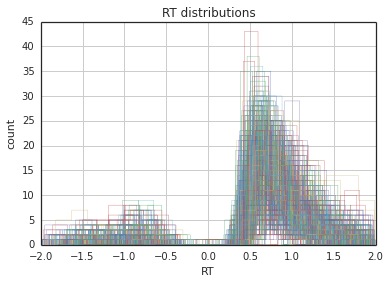

In [5]:
sns.set_style('white')
data = hddm.utils.flip_errors(data) #error RTs are flipped to be negative
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20,histtype='step', ax=ax)

In [9]:
m_stim = hddm.HDDM(data, depends_on={'v': 'task',
                                    't': 'task',
                                    'a': 'task'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000,dbname='traces.db',db='pickle')
m_stim.save('hcp_wm_LR')

 [-----------------100%-----------------] 10001 of 10000 complete in 11017.4 sec

Plotting a(0bk)
Plotting a(2bk)
Plotting v(0bk)
Plotting v(2bk)
Plotting t(0bk)
Plotting t(2bk)


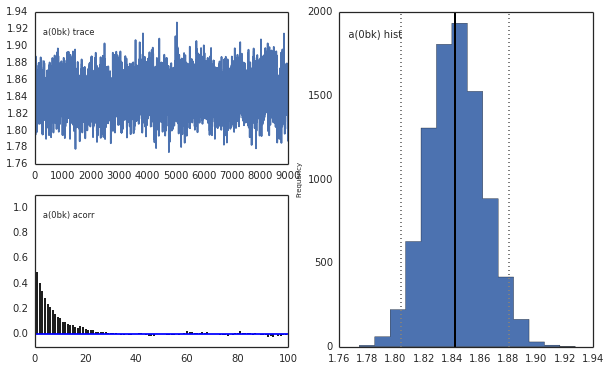

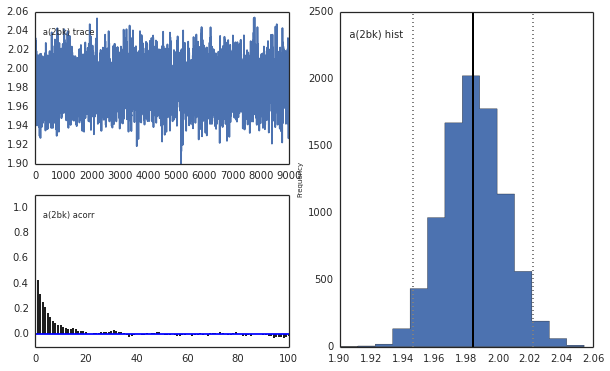

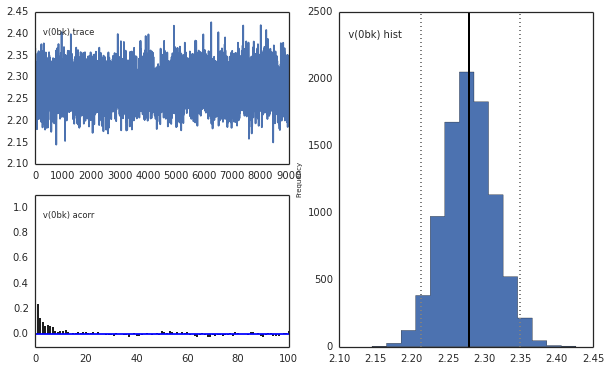

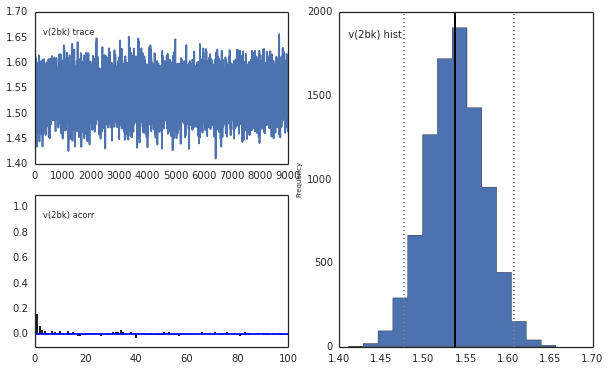

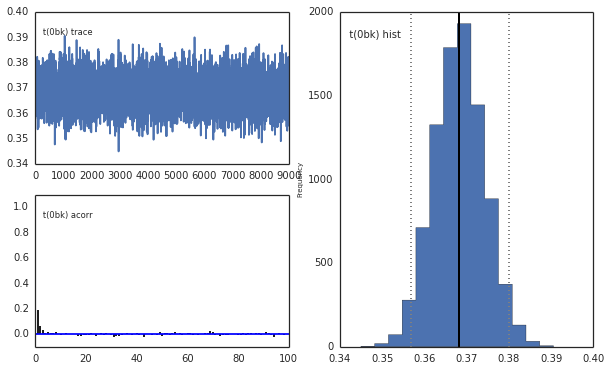

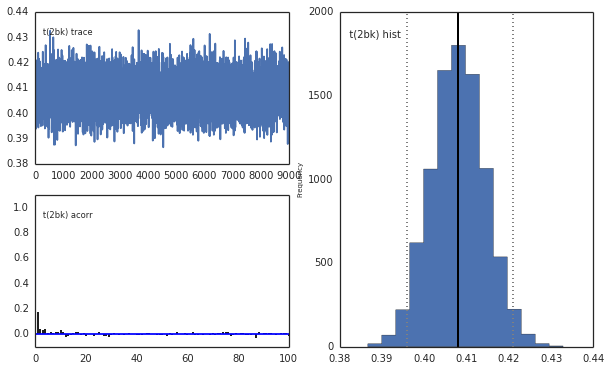

In [10]:
m_stim.plot_posteriors(['a','t','v'])

In [11]:
stats = m_stim.gen_stats()
stats.to_csv('hcp_wm_HDDM_2bk_0bk_model_LR.csv')
stats

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a(0bk),1.84282,0.0198503,1.8051,1.82917,1.84246,1.85584,1.88274,0.000545017
a(2bk),1.98446,0.0193007,1.9468,1.97153,1.98428,1.99728,2.02254,0.000461827
a_std,0.325814,0.013656,0.29935,0.31644,0.325727,0.334868,0.353261,0.000537972
a_subj(0bk).100307,1.69418,0.236006,1.2902,1.52555,1.67338,1.83735,2.22548,0.00646729
a_subj(2bk).100307,1.98738,0.173111,1.67238,1.86304,1.98109,2.10164,2.3441,0.00229496
a_subj(0bk).100408,1.66979,0.20573,1.31341,1.5241,1.65254,1.79952,2.11533,0.00545802
a_subj(2bk).100408,2.37249,0.254849,1.91367,2.19523,2.35885,2.53177,2.91637,0.00471223
a_subj(0bk).101006,1.44944,0.146392,1.19137,1.34503,1.43849,1.54037,1.7688,0.00333645
a_subj(2bk).101006,1.20024,0.102259,1.01708,1.12839,1.19389,1.26455,1.42113,0.00172467
a_subj(0bk).101107,1.70288,0.182083,1.38501,1.57611,1.68831,1.81541,2.10251,0.00377422


P(0bk > 2bk) =  1.0


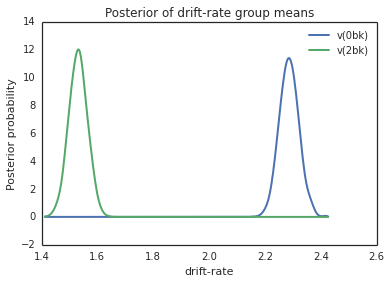

In [12]:
# Condition drift-rate posteriors
v_0, v_2 = m_stim.nodes_db.node[['v(0bk)','v(2bk)']]
hddm.analyze.plot_posterior_nodes([v_0, v_2])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(0bk > 2bk) = ", (v_0.trace() > v_2.trace()).mean()

P(2bk > 0bk) =  1.0


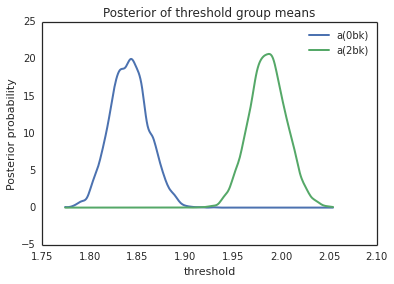

In [13]:
# Condition threshold posteriors
a_0, a_2 = m_stim.nodes_db.node[['a(0bk)','a(2bk)']]
hddm.analyze.plot_posterior_nodes([a_0, a_2])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means')

print "P(2bk > 0bk) = ", (a_2.trace() > a_0.trace()).mean()

P(2bk > 0bk) =  1.0


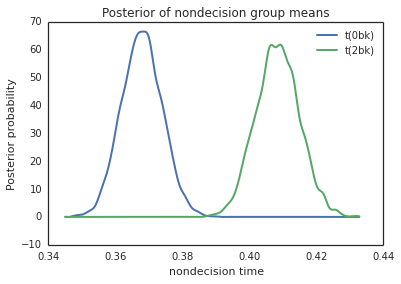

In [15]:
# Condition nondecision posteriors
t_0, t_2 = m_stim.nodes_db.node[['t(0bk)','t(2bk)']]
hddm.analyze.plot_posterior_nodes([t_0, t_2])
plt.xlabel('nondecision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of nondecision group means')

print "P(2bk > 0bk) = ", (t_2.trace() > t_0.trace()).mean()